In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kaggle

In [2]:
!kaggle datasets download -d lava18/google-play-store-apps


  0%|          | 0.00/1.94M [00:00<?, ?B/s]
 51%|#####1    | 1.00M/1.94M [00:01<00:01, 722kB/s]
100%|##########| 1.94M/1.94M [00:01<00:00, 1.19MB/s]
100%|##########| 1.94M/1.94M [00:01<00:00, 1.08MB/s]


In [3]:
google = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

In [4]:
google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
# Check for missing values in the 'Rating' column and drop rows with missing ratings
google = google.dropna(subset=['Rating'])


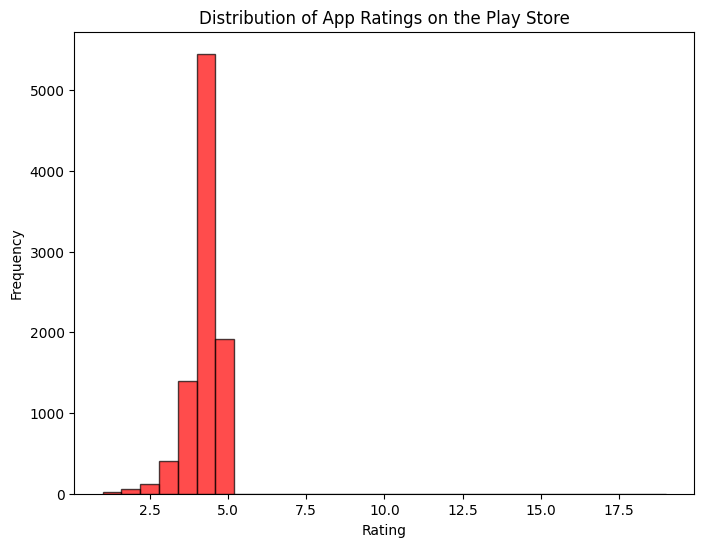

In [48]:
# Plot the distribution of app ratings
plt.figure(figsize=(8, 6))
plt.hist(google['Rating'], bins=30, edgecolor='k', alpha=0.7, color = 'red')
plt.title('Distribution of App Ratings on the Play Store')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
# In conclusion most of the app ratings 4-4.5.

In [8]:
# Now let's see the categories with the highest rating.
# Group the data by the 'Category' column and calculate the average ratings
average_ratings_by_category = google.groupby('Category')['Rating'].mean().reset_index()


In [9]:
# Sort the categories by average rating in descending order
average_ratings_by_category = average_ratings_by_category.sort_values(by='Rating', ascending=False).head(10)

In [10]:
# Display the categories with the highest average ratings
print(average_ratings_by_category)

               Category     Rating
0                   1.9  19.000000
11               EVENTS   4.435556
9             EDUCATION   4.389032
1        ART_AND_DESIGN   4.358065
4   BOOKS_AND_REFERENCE   4.346067
24      PERSONALIZATION   4.335987
23            PARENTING   4.300000
15                 GAME   4.286326
3                BEAUTY   4.278571
16   HEALTH_AND_FITNESS   4.277104


In [13]:
average_ratings_by_category.drop(average_ratings_by_category.head(1).index, inplace=True)
print(average_ratings_by_category) 


               Category    Rating
9             EDUCATION  4.389032
1        ART_AND_DESIGN  4.358065
4   BOOKS_AND_REFERENCE  4.346067
24      PERSONALIZATION  4.335987
23            PARENTING  4.300000
15                 GAME  4.286326
3                BEAUTY  4.278571
16   HEALTH_AND_FITNESS  4.277104


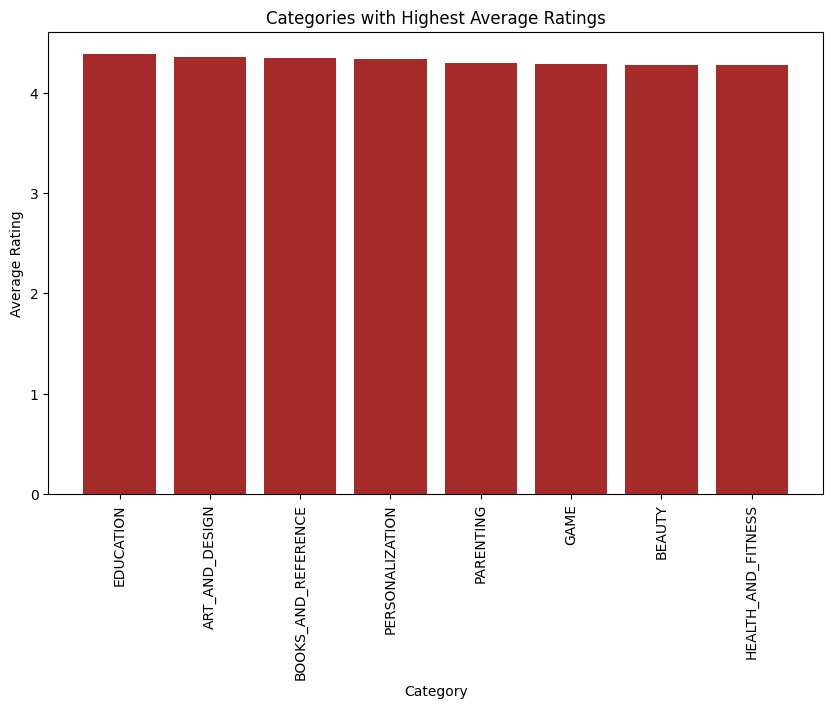

In [62]:
# To visualize the top catgories, create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_ratings_by_category['Category'].head(10), average_ratings_by_category['Rating'].head(10), color = 'brown')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Categories with Highest Average Ratings')
plt.xticks(rotation=90)
plt.show()
# As we can see all the top categories have similar ratings with minimal difference.

In [15]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [16]:
# To find a reltionship between ratings and downloads of these apps:

# Check for and handle missing values in the 'Rating' and 'Installs' columns
google = google.dropna(subset=['Rating', 'Installs'])

In [42]:
# Convert the 'Installs' column to a numeric format (removing '+' and ',')
google['Installs'] = google['Installs'].str.replace('+', '').str.replace(',', '').apply(lambda x: float(x) if x != '' else float('nan')).astype(float)

In [43]:
# Calculate the correlation between app ratings and the number of installs
correlation = google['Rating'].corr(google['Installs'])

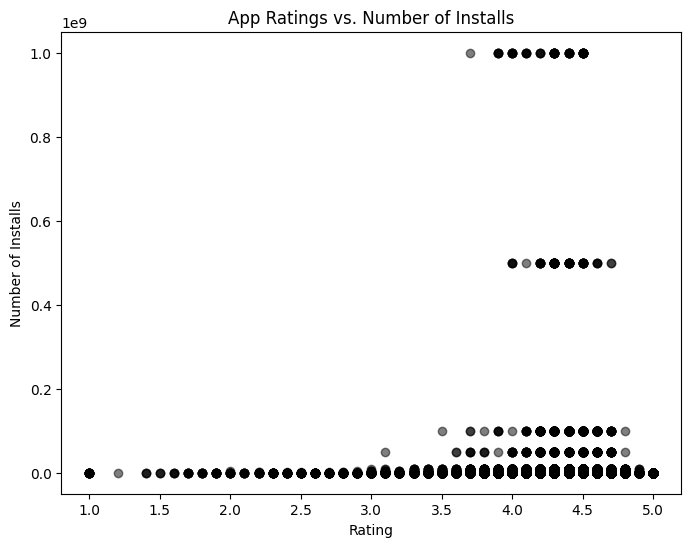

Correlation between app ratings and number of installs: 0.05


In [47]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(google['Rating'], google['Installs'], alpha=0.5, color = 'black')
plt.title('App Ratings vs. Number of Installs')
plt.xlabel('Rating')
plt.ylabel('Number of Installs')
plt.show()

# Display the correlation value
print(f'Correlation between app ratings and number of installs: {correlation:.2f}')

In [63]:
google


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [68]:
google = google.dropna(subset=['Size', 'Rating', 'Installs'])

In [72]:
google['Size'] = google['Size'].str.replace('M', '').str.replace('k', '').str.replace(',', '', regex=True).str.replace('Varies with device', '').apply(lambda x: float(x) if x != '' else float('nan')).astype(float)

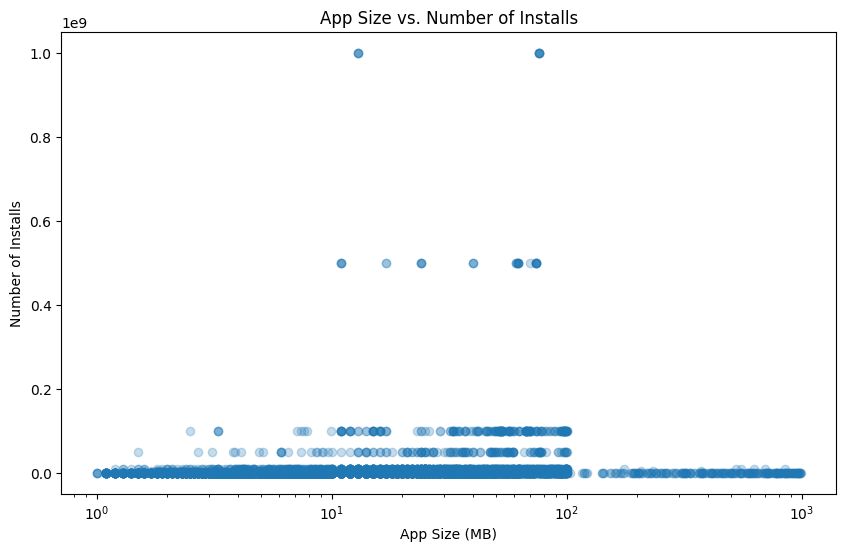

In [81]:
# Create a scatter plot to visualize the relationship between app size and downloads
plt.figure(figsize=(10, 6))
plt.scatter(google['Size'], google['Installs'], alpha= 0.25)
plt.title("App Size vs. Number of Installs")
plt.xlabel("App Size (MB)")
plt.ylabel("Number of Installs")
plt.xscale("log")

In [82]:
correlation_installs = google['Size'].corr(google['Installs'])
print(f'Correlation between app size and number of installs: {correlation_installs:.2f}')

Correlation between app size and number of installs: 0.02


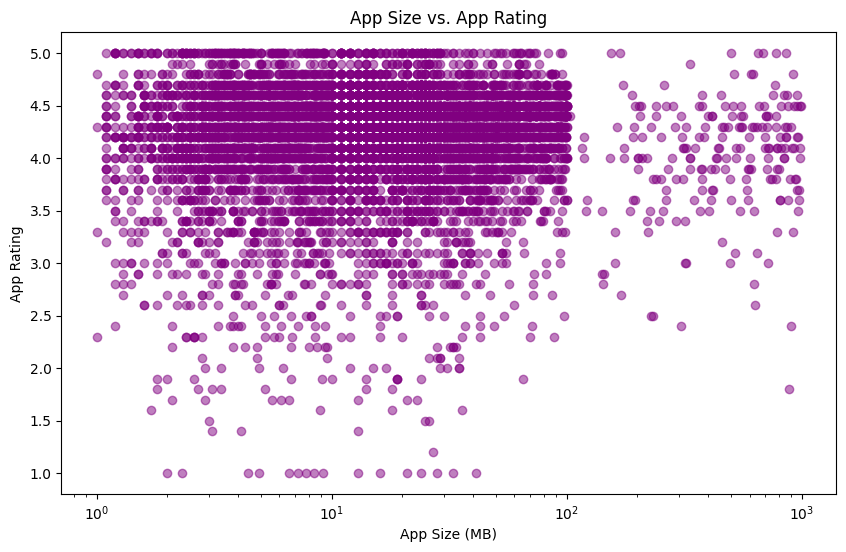

In [86]:
# Create a scatter plot to visualize the relationship between app size and ratings
plt.figure(figsize=(10, 6))
plt.scatter(google['Size'], google['Rating'], alpha=0.5, color = 'purple')
plt.title("App Size vs. App Rating")
plt.xlabel("App Size (MB)")
plt.ylabel("App Rating")
plt.xscale("log")

In [87]:
# Group the data by 'Category', sum the 'Installs' for each category, and sort by the total installs in descending order.
category_installs = google.groupby('Category')['Installs'].sum().sort_values(ascending=False)


In [88]:
# Select the top 5 categories by total installs
top_categories = category_installs.head(5).index

In [89]:
# Filter the data to include only the top 5 categories
data_top_categories = google[google['Category'].isin(top_categories)]

In [90]:
# Group the filtered data by 'Category' and calculate the share of installs for the top 5 apps in each category
share_of_top_apps = data_top_categories.groupby('Category')['Installs'].apply(lambda x: x / x.sum())

In [91]:
# Print the result
print(share_of_top_apps)

Category            
COMMUNICATION  335      3.063046e-02
               336      3.063046e-02
               337      3.063046e-04
               338      3.063046e-02
               339      3.063046e-03
                            ...     
TOOLS          10786    4.366536e-06
               10795    8.733072e-06
               10796    8.733072e-05
               10800    4.366536e-07
               10817    8.733072e-06
Name: Installs, Length: 2769, dtype: float64


In [92]:
share_of_top_apps = share_of_top_apps.reset_index()

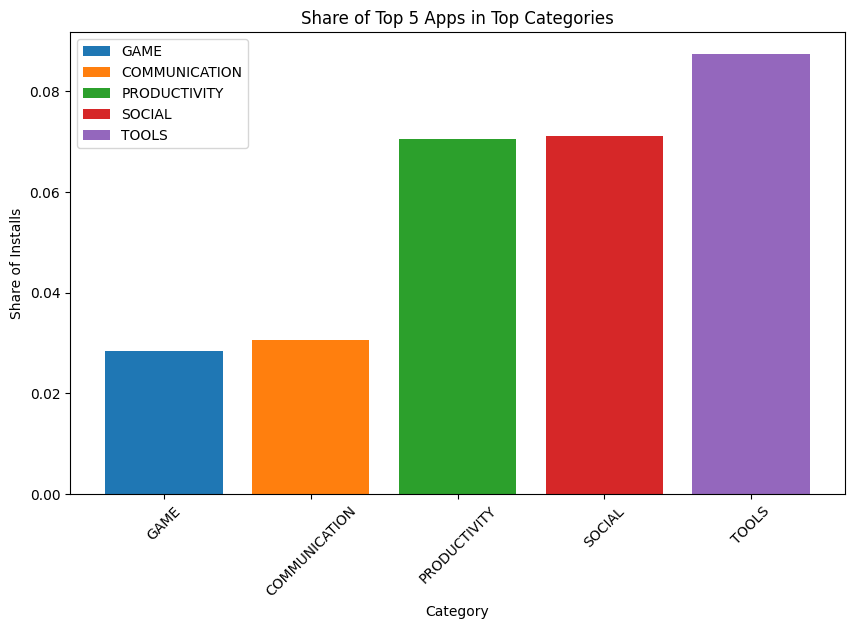

In [93]:
plt.figure(figsize=(10, 6))
for category in top_categories:
    subset = share_of_top_apps[share_of_top_apps['Category'] == category]
    plt.bar(subset['Category'], subset['Installs'], label=category)

plt.xlabel('Category')
plt.ylabel('Share of Installs')
plt.title('Share of Top 5 Apps in Top Categories')
plt.legend()
plt.xticks(rotation=45)
plt.show()